In [1]:
import numpy as np
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=y-output
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=-y.dot(np.log(output))-((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [3]:
X_train_01_subset = X_train_std[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

In [4]:
lrgd = LogisticRegressionGD(eta=0.05,
                           n_iter=1000,
                           random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

In [5]:
from funzioni import plot_decision_regions

/home/mariano/Documenti/uni/magistrale/ml/funzioni.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


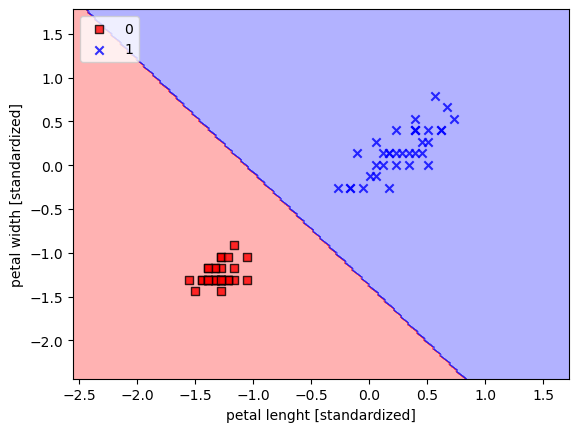

In [9]:
import matplotlib.pyplot as plt
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)
plt.xlabel("petal lenght [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

/home/mariano/Documenti/uni/magistrale/ml/funzioni.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


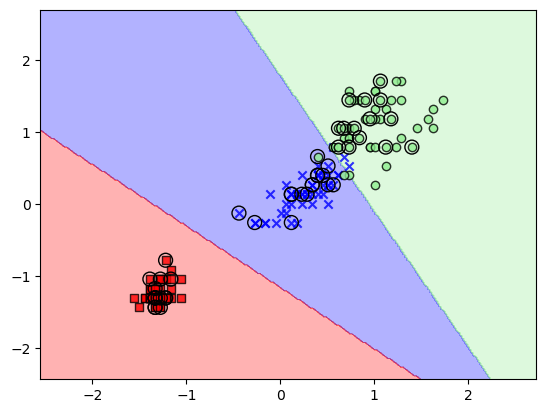

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
lr.fit(X_train_std,y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150))
plt.show()

In [12]:
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [21]:
lr.score(X_test,y_test)

0.3333333333333333